In [1]:
from sklearn.utils import shuffle
from keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import models
from collections import Counter
from tensorflow.keras.utils import to_categorical,Sequence

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255
# train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)


x, y = shuffle(train_images, train_labels, random_state=15)
x_train = x[0:100]
y_train = y[0:100].reshape(-1, 1)
y_train = to_categorical(y_train) 

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(100, 28, 28, 1)

In [4]:
Counter(y[0:100])

Counter({0: 7, 1: 12, 2: 11, 3: 8, 4: 12, 5: 8, 6: 12, 7: 13, 8: 8, 9: 9})

In [8]:
EPOCHES = 100

# Without augmentation

In [9]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

mcp = ModelCheckpoint("/content/baseline_best.h5", monitor='val_accuracy', verbose=0, save_best_only=True, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_4 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                  

In [11]:
history = model.fit(x_train, y_train, validation_data=(test_images, test_labels), epochs=EPOCHES, callbacks=[mcp])

Epoch 1/100
4/4 [==============================] - 4s 976ms/step - loss: 3.3484 - accuracy: 0.1600 - val_loss: 2.2900 - val_accuracy: 0.1861
Epoch 2/100
4/4 [==============================] - 3s 890ms/step - loss: 1.8415 - accuracy: 0.3600 - val_loss: 2.2788 - val_accuracy: 0.2886
Epoch 3/100
4/4 [==============================] - 2s 519ms/step - loss: 1.2281 - accuracy: 0.6200 - val_loss: 2.2667 - val_accuracy: 0.5737
Epoch 4/100
4/4 [==============================] - 1s 484ms/step - loss: 0.7298 - accuracy: 0.7500 - val_loss: 2.2570 - val_accuracy: 0.4867
Epoch 5/100
4/4 [==============================] - 3s 864ms/step - loss: 0.7237 - accuracy: 0.7500 - val_loss: 2.2491 - val_accuracy: 0.4710
Epoch 6/100
4/4 [==============================] - 1s 494ms/step - loss: 0.6347 - accuracy: 0.7700 - val_loss: 2.2432 - val_accuracy: 0.4160
Epoch 7/100
4/4 [==============================] - 3s 864ms/step - loss: 0.4345 - accuracy: 0.8700 - val_loss: 2.2339 - val_accuracy: 0.3891
Epoch 8/100
4

### best accuracy

In [12]:
#test_model = load_model("/content/baseline_best.h5")
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 2s 6ms/step - loss: 0.7715 - accuracy: 0.7756


0.775600016117096

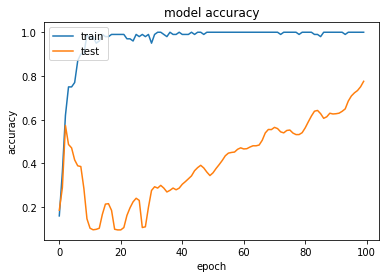

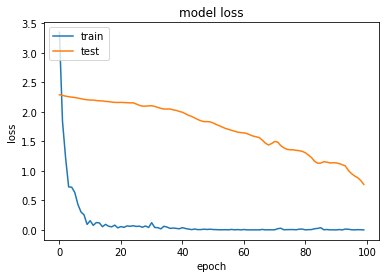

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) #val_accuracy #val_acc
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# With RandAug

In [14]:
!pip install imgaug -U

     |████████████████████████████████| 948 kB 5.2 MB/s 
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


In [15]:
from imgaug import augmenters as iaa

In [16]:
#L'entraînement de l'ensemble des données n'est pas suffisant en mémoire, alors on define un générateur

class generator(Sequence):
    #Appliquer RandAug
    def aug(self,x):
        
        seq = iaa.Sequential([
            iaa.RandAugment(n=3, m=7),
            iaa.Resize({"height": 28, "width": 28})
            ])
        x=seq.augment_images(x)
        #Normalisation, le modèle de pré-entraînement dans keras.applications consiste à normaliser les données à [-1,1],
        # et le modèle de pré-entraînement dans TF hub est de normaliser les données à [0,1]
        x=x.astype('float32')/255
        return x

    def __init__(self, x_set, y_set, batch_size):
        self.x_set , self.y_set = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x_set) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x1 = self.x_set[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y1 = self.y_set[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x1=self.aug(batch_x1)

        return batch_x1,batch_y1
  
    #Cette fonction sera automatiquement exécutée à la fin de chaque époque pendant l'entraînement
    def on_epoch_end(self):
        print("fin d'époque")

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:100]
y_train = y_train[:100]

#mnist doit être converti en une image à 3 canaux
x_train=np.stack((x_train,)*3, axis=-1)
x_test=np.stack((x_test,)*3, axis=-1)

#Un encodage 
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)


In [18]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

mcp = ModelCheckpoint("/content/weights-hub.hdf5", monitor='val_accuracy', verbose=0, save_best_only=True, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [19]:
batchsize=32
g = generator(x_train , y_train , batchsize)

In [20]:
history2 =model.fit_generator(g, 
                    steps_per_epoch=int(x_train.shape[0]/batchsize),
                    epochs= EPOCHES, 
                    # verbose=1, 
                    callbacks=[mcp], 
                    validation_data=(x_test, y_test), 
                    # validation_steps=None, 
                    # class_weight=None, 
                    max_queue_size=10, 
                    workers=2, 
                    use_multiprocessing=False, 
                    shuffle=True
                    #initial_epoch=0
                    )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/100
3/3 [==============================] - 3s 930ms/step - loss: 3.4158 - accuracy: 0.0882 - val_loss: 36.0736 - val_accuracy: 0.1163
fin d'époque
Epoch 2/100
3/3 [==============================] - 2s 778ms/step - loss: 3.4558 - accuracy: 0.1324 - val_loss: 55.1083 - val_accuracy: 0.1650
fin d'époque
Epoch 3/100
3/3 [==============================] - 2s 788ms/step - loss: 3.0305 - accuracy: 0.1618 - val_loss: 71.6838 - val_accuracy: 0.1045
fin d'époque
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 2.9659 - accuracy: 0.1912 - val_loss: 66.6045 - val_accuracy: 0.0992
fin d'époque
Epoch 5/100
3/3 [==============================] - 2s 778ms/step - loss: 2.4667 - accuracy: 0.2794 - val_loss: 35.9537 - val_accuracy: 0.1762
fin d'époque
Epoch 6/100
3/3 [==============================] - 2s 781ms/step - loss: 2.6478 - accuracy: 0.2059 - val_loss: 20.6852 - val_accuracy: 0.2533
fin d'époque
Epoch 7/100
3/3 [==============================] - 2s 796ms/step - loss: 

## Best accuracy

In [21]:
#test_model = load_model("/content/weights-hub.hdf5")
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

313/313 [==============================] - 2s 6ms/step - loss: 32.5479 - accuracy: 0.7287


0.7286999821662903

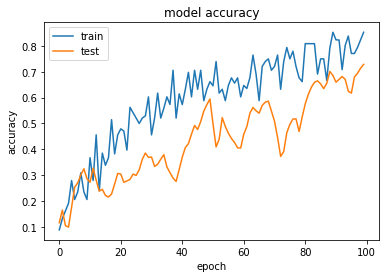

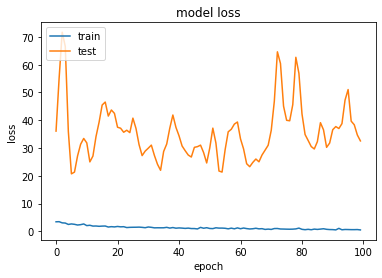

In [22]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# all data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255
# train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)


x, y = shuffle(train_images, train_labels, random_state=15)
x_train = x
y_train = y.reshape(-1, 1)
y_train = to_categorical(y_train) 

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

mcp = ModelCheckpoint("/content/baseline_allData_best.h5", monitor='val_accuracy', verbose=0, save_best_only=True, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_8 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                  

In [13]:
history = model.fit(x_train, y_train, validation_data=(test_images, test_labels), epochs=EPOCHES, callbacks=[mcp])

Epoch 1/100
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1595 - accuracy: 0.9516 - val_loss: 0.0381 - val_accuracy: 0.9886
Epoch 2/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0698 - accuracy: 0.9805 - val_loss: 0.0283 - val_accuracy: 0.9906
Epoch 3/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0535 - accuracy: 0.9851 - val_loss: 0.0315 - val_accuracy: 0.9897
Epoch 4/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0445 - accuracy: 0.9872 - val_loss: 0.0327 - val_accuracy: 0.9905
Epoch 5/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0361 - accuracy: 0.9897 - val_loss: 0.0289 - val_accuracy: 0.9925
Epoch 6/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0327 - accuracy: 0.9911 - val_loss: 0.0342 - val_accuracy: 0.9904
Epoch 7/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0295 - accuracy: 0.9914 - val_loss: 0

### best accuracy

In [14]:
#test_model = load_model("/content/baseline_allData_best.h5")
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 2s 6ms/step - loss: 0.0846 - accuracy: 0.9945


0.9944999814033508

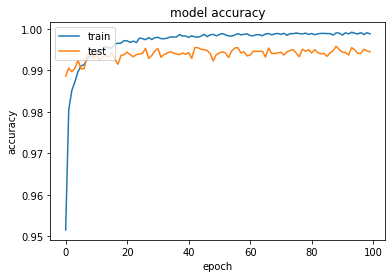

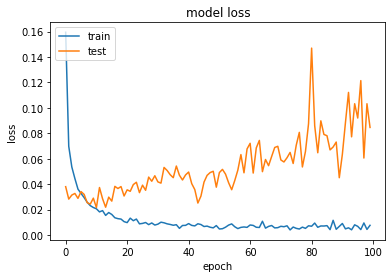

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) #val_accuracy #val_acc
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()